# Performance

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def mse(y: np.ndarray, y_pred: np.ndarray) -> float:
    """Compute the mse loss.
    
    Arguments:
        y {[np.ndarray]} -- 1D float values.
        y_pred {[np.ndarray]} -- 1D float values.
    
    Returns:
        float -- MSE value.
    """
    d = (y_pred - y)
    return np.mean(d*d)

In [2]:
ground_truth_train = np.load(file="./data/rated_embeddings_train.npy")
rating_pred_train = np.load(file="./data/rating_pred_train_latent_nn.npy")
train_true_ratings = ground_truth_train[:,-1]
train_pred_ratings = rating_pred_train
print("train_mse=", mse(train_pred_ratings, train_true_ratings))

ground_truth_valid = np.load(file="./data/rated_embeddings_valid.npy")
rating_pred_valid = np.load(file="./data/rating_pred_valid_latent_nn.npy")
valid_true_ratings = ground_truth_valid[:,-1]
valid_pred_ratings = rating_pred_valid
print("valid_mse=", mse(valid_pred_ratings, valid_true_ratings))

print("random_model_train_mse=", mse(np.mean(train_true_ratings), train_true_ratings))
print("random_model_valid_mse=", mse(np.mean(train_true_ratings), valid_true_ratings))

train_mse= 0.6910832995219797
valid_mse= 1.273308887528692
random_model_train_mse= 1.0865041405061118
random_model_valid_mse= 1.0882674985568206


### Rating distribution

#### Training (ground truth)

num_data_points= 80668
mean= 3.5021817821193038


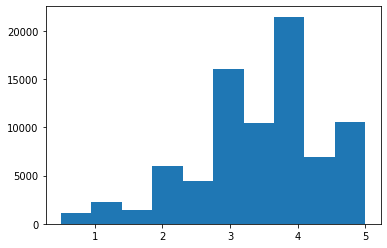

In [3]:
plt.hist(x=train_true_ratings, bins=10)
print("num_data_points=", train_true_ratings.shape[0])
print("mean=", np.mean(train_true_ratings))

#### Training (prediction)

num_data_points= 80668
mean= 3.486391376608476


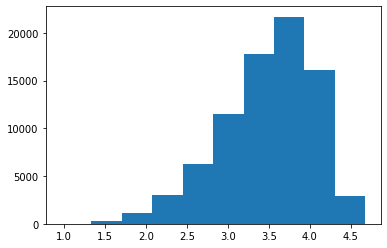

In [4]:
plt.hist(x=train_pred_ratings, bins=10)
print("num_data_points=", train_pred_ratings.shape[0])
print("mean=", np.mean(train_pred_ratings))

Training rating distribution doesn't look alike. The model only captures the mean.

#### Validation (ground truth)

num_data_points= 20168
mean= 3.4990579135263786


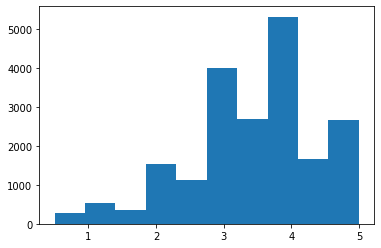

In [5]:
plt.hist(x=valid_true_ratings, bins=10)
print("num_data_points=", valid_true_ratings.shape[0])
print("mean=", np.mean(valid_true_ratings))

#### Validation (prediction)

num_data_points= 20168
mean= 3.3679224347864904


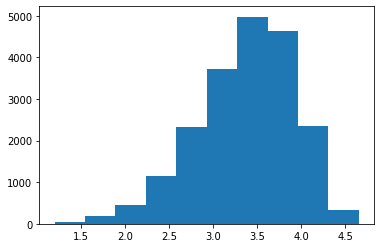

In [6]:
plt.hist(x=valid_pred_ratings, bins=10)
print("num_data_points=", valid_pred_ratings.shape[0])
print("mean=", np.mean(valid_pred_ratings))

So as the validation.

# Prediction plot

In [7]:
train_x = ground_truth_train[:, 2:-1]
id_pairs = ground_truth_train[:, :2]

print("num_features=", train_x.shape[1])

num_features= 20


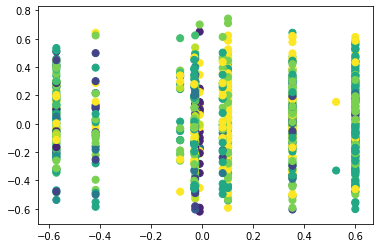

In [9]:
plt.scatter(x=train_x[:1000,0], y=train_x[:1000,10], c=train_true_ratings[:1000], vmin=0, vmax=5, s=50)

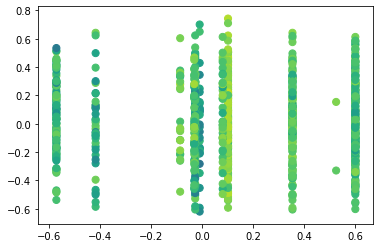

In [11]:
plt.scatter(x=train_x[:1000,0], y=train_x[:1000,10], c=train_pred_ratings[:1000], vmin=0, vmax=5, s=50)

In [12]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
tsne_train_x = tsne.fit_transform(train_x[:1000, :])

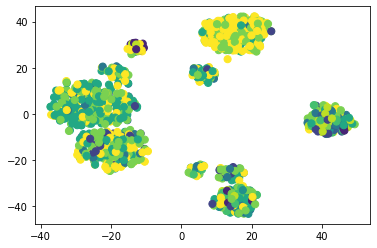

In [13]:
plt.scatter(x=tsne_train_x[:,0], y=tsne_train_x[:,1], c=train_true_ratings[:1000], vmin=0, vmax=5, s=50)

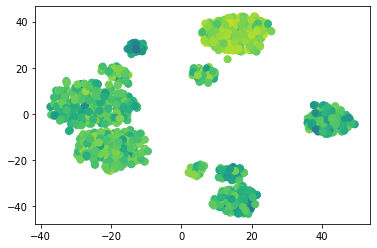

In [14]:
plt.scatter(x=tsne_train_x[:,0], y=tsne_train_x[:,1], c=train_pred_ratings[:1000], vmin=0, vmax=5, s=50)

# Prediction samples

In [15]:
print("training_ground_truth=", train_true_ratings[:20])

training_ground_truth= [4. 4. 5. 5. 3. 5. 5. 5. 5. 3. 4. 5. 3. 3. 5. 4. 4. 5. 4. 3.]


In [16]:
print("training_prediction=", np.around(a=train_pred_ratings[:20], decimals=1))

training_prediction= [4.4 3.9 4.4 4.5 4.2 4.4 4.2 4.2 3.9 4.4 4.4 4.5 4.6 4.  4.2 4.3 4.5 4.2
 3.9 3.9]


In [18]:
print("validation_ground_truth=", valid_true_ratings[:20])

validation_ground_truth= [4. 4. 5. 5. 4. 5. 4. 5. 5. 5. 5. 4. 5. 5. 5. 4. 4. 5. 3. 5.]


In [19]:
print("validation_prediction=", np.around(a=valid_pred_ratings[:20], decimals=1))

validation_prediction= [3.5 4.2 3.1 3.8 4.  3.3 4.2 3.8 3.9 3.5 3.7 2.9 3.9 4.3 4.1 4.  4.  4.1
 3.1 3.6]


### When ratings are low

In [17]:
print("training_prediction(2)=", np.around(a=train_pred_ratings[train_true_ratings == 2][: 20], decimals=1))

training_prediction(2)= [4.4 3.5 3.6 3.8 3.2 2.7 4.  3.9 3.1 3.9 3.5 2.9 3.9 3.5 3.6 3.9 4.  3.8
 4.1 2.8]


In [20]:
print("validation_prediction(2)=", np.around(a=valid_pred_ratings[valid_true_ratings == 2][: 20], decimals=1))

validation_prediction(2)= [3.3 3.8 3.4 3.1 2.5 2.9 3.2 2.7 3.3 3.2 3.7 2.8 3.2 3.7 3.6 3.7 2.3 2.7
 3.2 3. ]
